In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.covariance import LedoitWolf
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


import tensorflow as tf

sns.set()

In [2]:
faultfree = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Training.csv').iloc[:,1:]
faulty = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_Faulty_Training.csv').iloc[:,1:]
#fftest = pd.read_csv('/content/drive/MyDrive/Thesis/TEP_FaultFree_Testing.csv').iloc[:,1:]

In [3]:
X_dict = {
'XMEAS_1':'XMEAS1',
'XMEAS_2':'XMEAS2',
'XMEAS_3':'XMEAS3',
'XMEAS_4':'XMEAS4',
'XMEAS_5':'XMEAS5',
'XMEAS_6':'XMEAS6',
'XMEAS_7':'XMEAS7',
'XMEAS_8':'XMEAS8',
'XMEAS_9':'XMEAS9',
'XMEAS_10':'XMEAS10',
'XMEAS_11':'XMEAS11',
'XMEAS_12':'XMEAS12',
'XMEAS_13':'XMEAS13',
'XMEAS_14':'XMEAS14',
'XMEAS_15':'XMEAS15',
'XMEAS_16':'XMEAS16',
'XMEAS_17':'XMEAS17',
'XMEAS_18':'XMEAS18',
'XMEAS_19':'XMEAS19',
'XMEAS_20':'XMEAS20',
'XMEAS_21':'XMEAS21',
'XMEAS_22':'XMEAS22',
'XMEAS_23':'XMEAS23',
'XMEAS_24':'XMEAS24',
'XMEAS_25':'XMEAS25',
'XMEAS_26':'XMEAS26',
'XMEAS_27':'XMEAS27',
'XMEAS_28':'XMEAS28',
'XMEAS_29':'XMEAS29',
'XMEAS_30':'XMEAS30',
'XMEAS_31':'XMEAS31',
'XMEAS_32':'XMEAS32',
'XMEAS_33':'XMEAS33',
'XMEAS_34':'XMEAS34',
'XMEAS_35':'XMEAS35',
'XMEAS_36':'XMEAS36',
'XMEAS_37':'XMEAS37',
'XMEAS_38':'XMEAS38',
'XMEAS_39':'XMEAS39',
'XMEAS_40':'XMEAS40',
'XMEAS_41':'XMEAS41',
'XMV_1':'XMV1',
'XMV_2':'XMV2',
'XMV_3':'XMV3',
'XMV_4':'XMV4',
'XMV_5':'XMV5',
'XMV_6':'XMV6',
'XMV_7':'XMV7',
'XMV_8':'XMV8',
'XMV_9':'XMV9',
'XMV_10':'XMV10',
'XMV_11':'XMV11',
'XMV_12':'XMV12'
   }

faultfree = faultfree.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
faulty = faulty.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
#fftest = fftest.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

In [4]:
df = faultfree.drop(faultfree.columns[:3], axis=1)
colnames = df.columns.tolist()
N = df.shape[1]

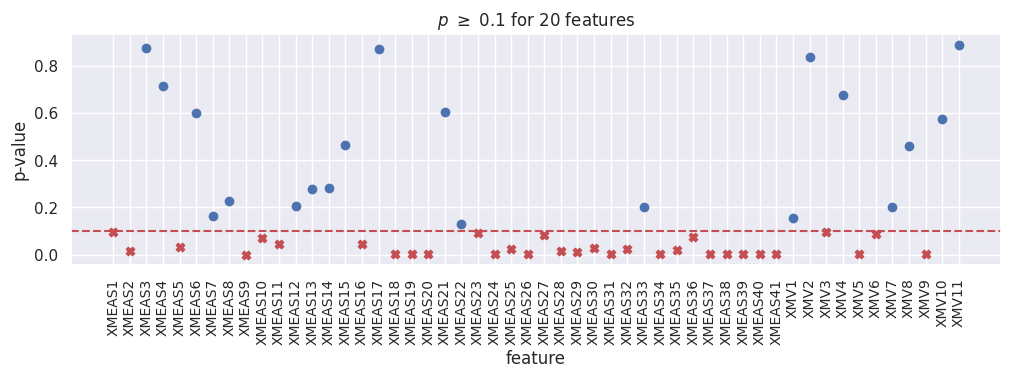

In [5]:
# Shapiro-Wilk null hypothesis

simRange = 9
alpha = 0.1 # significance level
x_axis = list(range(0,N))

def get_shapiro(DataFrame, cols, faultnum):
    shapiro_history = [] # initiate empty array, append as we go

    for col in range(len(cols)):
        data = DataFrame[(DataFrame.faultNumber == faultnum) &
         (DataFrame.simulationRun.isin(range(simRange)))][cols[col]]
        shapiro = stats.shapiro(data)
            # returns a tuple
        shapiro_history.append(shapiro)
            # create list of tuples

    return shapiro_history
        # return list of tuples

def plot_shapiro(shapiro_history):
    W, p = zip(*shapiro_history)

    # Color the points based on whether their p-value is below or equal to the threshold
    colors = ['r' if val <= alpha else 'b' for val in p]


    plt.figure(figsize=(12, 3))
    for i, val in enumerate(p):
        style = 'X' if val <= alpha else 'o'
        plt.scatter(i, val, c=colors[i], marker=style)

    plt.axhline(y=alpha, color='r', linestyle='--')
    plt.title(r'$p\ \geq$ {0} for {1} features'.format(alpha, len([i for i in p if i >= alpha])))
    plt.xlabel('feature')
    plt.ylabel('p-value')

    # Assuming colnames is defined in your code
    new_xticks = range(len(p))
    new_xtick_labels = colnames
    plt.xticks(new_xticks, new_xtick_labels, rotation=90, fontsize=10)

    plt.show()


def get_normal_features(DataFrame, cols, faultnum=0):
    variable_names = []  # initiate empty array for variable names

    for col in range(len(cols)):
        data = DataFrame[(DataFrame.faultNumber == faultnum) &
         (DataFrame.simulationRun.isin(range(simRange)))][cols[col]]
        shapiro = stats.shapiro(data)
        p_value = shapiro[1]  # Extract the p-value from the tuple

        if p_value > alpha:
            variable_names.append(cols[col])

    return variable_names

fault_free_shapiro = get_shapiro(faultfree, faultfree.columns[3:55], faultnum=0)
faulty_shapiro = get_shapiro(faulty, faultfree.columns[3:55], faultnum=1)
plot_shapiro(fault_free_shapiro)
normal_features = get_normal_features(faultfree, faultfree.columns[3:55], faultnum=0)

In [ ]:
normal_features

['XMEAS3',
 'XMEAS4',
 'XMEAS6',
 'XMEAS7',
 'XMEAS8',
 'XMEAS12',
 'XMEAS13',
 'XMEAS14',
 'XMEAS15',
 'XMEAS17',
 'XMEAS21',
 'XMEAS22',
 'XMEAS33',
 'XMV1',
 'XMV2',
 'XMV4',
 'XMV7',
 'XMV8',
 'XMV10',
 'XMV11']

-----------------------------------------------

In [6]:
simRange = (1,21)
len(range(*simRange))

20

In [7]:
faultfree_selected = faultfree[faultfree['simulationRun'].isin(range(*simRange))][normal_features]
#faultfree_selected = faultfree[normal_features]

In [8]:
mean_faultfree = np.mean(faultfree_selected, axis=0)

covEstimator = LedoitWolf()
cov_faultfree = covEstimator.fit(faultfree_selected).covariance_

In [9]:
multivariate_dist = stats.multivariate_normal(mean=mean_faultfree, cov=cov_faultfree)

faultfree_selected = faultfree_selected.astype(np.float64)
mahalanobis_distances = np.array([
    np.linalg.norm(
        np.dot(np.subtract(x.values, mean_faultfree), np.linalg.inv(cov_faultfree)).dot(np.subtract(x.values, mean_faultfree).T)
    ) for _, x in faultfree_selected.iterrows()
])

threshold = np.mean(mahalanobis_distances) + 3 * np.std(mahalanobis_distances)

In [10]:
false_df = faultfree[faultfree['simulationRun'].isin(range(46, 50))][normal_features]
false_dist = np.array([
    np.linalg.norm(
        np.dot(np.subtract(x.values, mean_faultfree), np.linalg.inv(cov_faultfree)).dot(np.subtract(x.values, mean_faultfree).T)
    ) for _, x in false_df.iterrows()
])
false_dist

array([10.93058454, 16.13397186, 17.35234238, ..., 18.76538925,
       21.22656644, 19.23780955])

In [ ]:
len(np.where(false_dist > threshold))*100/len(false_dist)

0.05

In [11]:
fault = 19

#faulty_selected = faulty[(faulty['faultNumber']==fault) & (faulty['simulationRun'].isin(range(*simRange)))][normal_features]
faulty_selected = faulty[(faulty['faultNumber']==fault) & (faulty['simulationRun']==1)][normal_features]

faulty_mahalanobis_distances = np.array([
    np.linalg.norm(
        np.dot(np.subtract(x.values, mean_faultfree), np.linalg.inv(cov_faultfree)).dot(np.subtract(x.values, mean_faultfree).T)
    ) for _, x in faulty_selected.iterrows()
])

detection = faulty_selected[faulty_mahalanobis_distances > threshold]
len(detection)/(480*len(range(*simRange)))


0.0040625

Text(0, 0.5, 'Mahalanobis Distance')

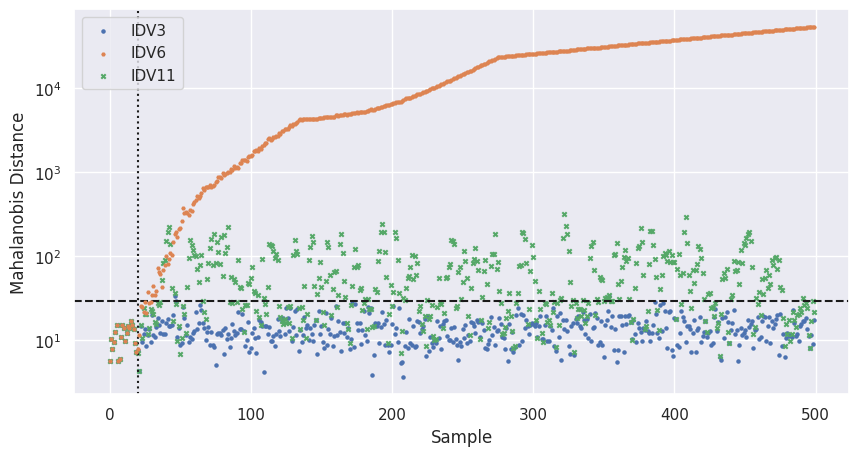

In [12]:
def get_mahalanobis_distances(fault):
    faulty_selected = faulty[(faulty['faultNumber']==fault) & (faulty['simulationRun']==1)][normal_features]

    faulty_mahalanobis_distances = np.array([
        np.linalg.norm(
            np.dot(np.subtract(x.values, mean_faultfree), np.linalg.inv(cov_faultfree)).dot(np.subtract(x.values, mean_faultfree).T)
        ) for _, x in faulty_selected.iterrows()
    ])
    return faulty_mahalanobis_distances

dist3 = get_mahalanobis_distances(3)
dist6 = get_mahalanobis_distances(6)
dist11 = get_mahalanobis_distances(11)

plt.figure(figsize=(10,5))
#plt.plot(faulty_mahalanobis_distances)
plt.scatter(x=range(0, 500), y=dist3, s=5, label='IDV3', marker = 'o', zorder=1)
plt.scatter(x=range(0, 500), y=dist6, s=5, label='IDV6', marker = 'H', zorder=3)
plt.scatter(x=range(0, 500), y=dist11, s=10, label='IDV11', marker = 'x', zorder=2)
plt.axhline(threshold, ls='dashed', c='k')
plt.legend(loc='upper left')
#for simRun in range(len(range(*simRange))):
    #plt.axvline(simRun*500, c='k', ls='dotted', lw=1)
plt.axvline(20, c='k', ls='dotted')

plt.yscale('log')
plt.xlabel('Sample')
plt.ylabel('Mahalanobis Distance')

In [ ]:
range(len(faulty_mahalanobis_distances))

range(0, 500)

ValueError: x and y must be the same size

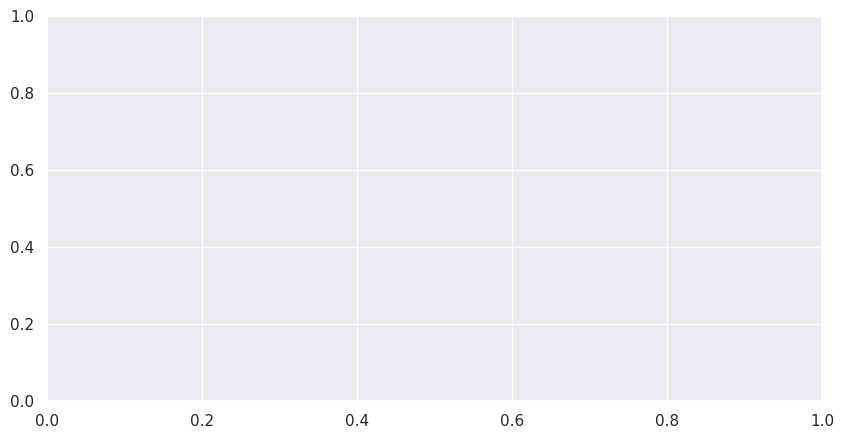

In [ ]:
plt.figure(figsize=(10,5))
#plt.plot(faulty_mahalanobis_distances)
plt.scatter(x=mahalanobis_distances, y=faulty_mahalanobis_distances, s=0.1)
plt.scatter(mahalanobis_distances, mahalanobis_distances, c='k', s=2)
plt.axhline(threshold, ls='dotted', c='k')

#for simRun in range(len(range(*simRange))):
    #plt.axvline(simRun*500, c='k', ls='dotted', lw=1)


plt.yscale('log')
plt.xlabel('Mahalanobis Distance - Faultfree')
plt.ylabel('Mahalanobis Distance - Faulty')
plt.title(f'IDV{fault}')

Text(0.5, 1.0, 'IDV19')

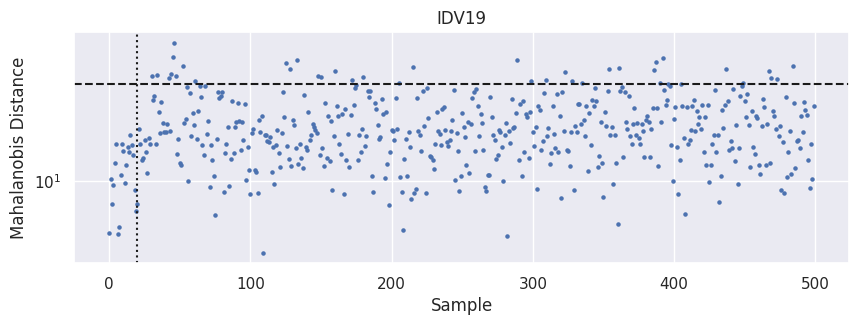

In [ ]:


plt.figure(figsize=(10,3))
#plt.plot(faulty_mahalanobis_distances)
plt.scatter(x=range(len(faulty_mahalanobis_distances)), y=faulty_mahalanobis_distances, s=5)
plt.axhline(threshold, ls='dashed', c='k')

#for simRun in range(len(range(*simRange))):
    #plt.axvline(simRun*500, c='k', ls='dotted', lw=1)
plt.axvline(20, c='k', ls='dotted')

plt.yscale('log')
plt.xlabel('Sample')
plt.ylabel('Mahalanobis Distance')
plt.title(f'IDV{fault}')

In [ ]:
faulty_mahalanobis_distances.shape

(500,)

In [18]:
simRange = (1,21)

In [19]:
scoreDict = {}

for fault in range(1,21):
    faulty_selected = faulty[(faulty['faultNumber']==fault) & (faulty['simulationRun'].isin(range(*simRange)))][normal_features]

    faulty_mahalanobis_distances = np.array([
        np.linalg.norm(
            np.dot(np.subtract(x.values, mean_faultfree), np.linalg.inv(cov_faultfree)).dot(np.subtract(x.values, mean_faultfree).T)
        ) for _, x in faulty_selected.iterrows()
    ])

    detection = faulty_selected[faulty_mahalanobis_distances > threshold]
    score = len(detection)/(480*len(range(*simRange)))
    scoreDict[f'IDV{fault}'] = score

    plt.figure(figsize=(10,3))
    #plt.plot(faulty_mahalanobis_distances)
    plt.scatter(x=range(len(faulty_mahalanobis_distances)), y=faulty_mahalanobis_distances, s=1)
    plt.axhline(threshold, ls='dashed', c='k')

    for simRun in range(len(range(*simRange))):
        plt.axvline(simRun*500, c='k', ls='dotted', lw=1)

    plt.yscale('log')
    plt.xlabel('Sample')
    plt.ylabel('Mahalanobis Distance')
    plt.title(f'IDV{fault}')

scoreDict

Output hidden; open in https://colab.research.google.com to view.

In [28]:
%colors

UsageError: %colors: you must specify a color scheme. See '%colors?'


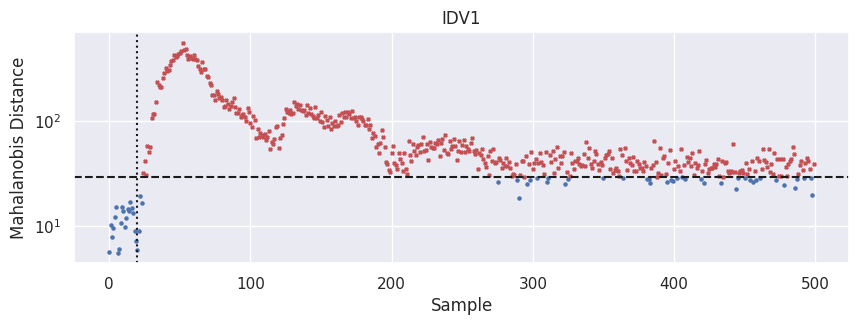

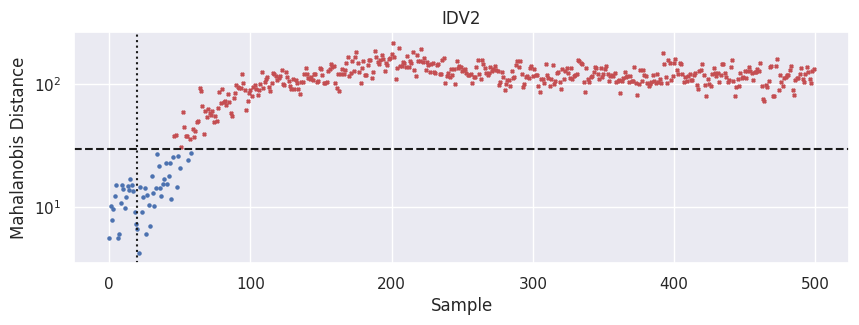

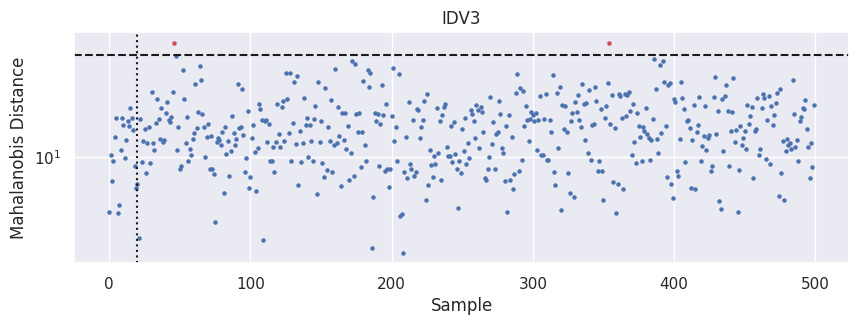

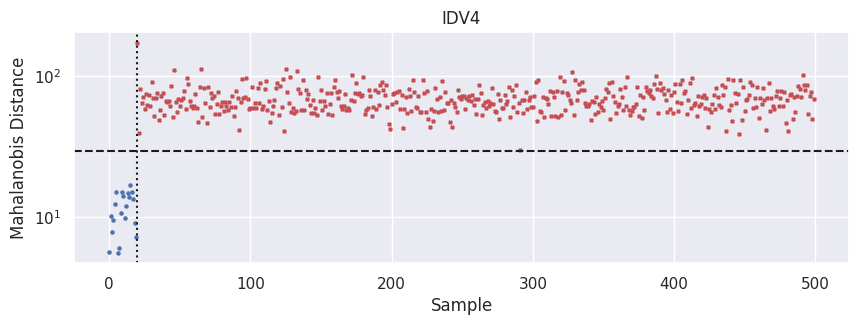

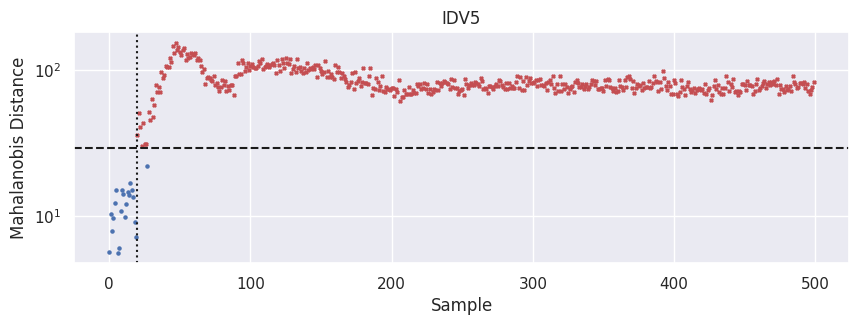

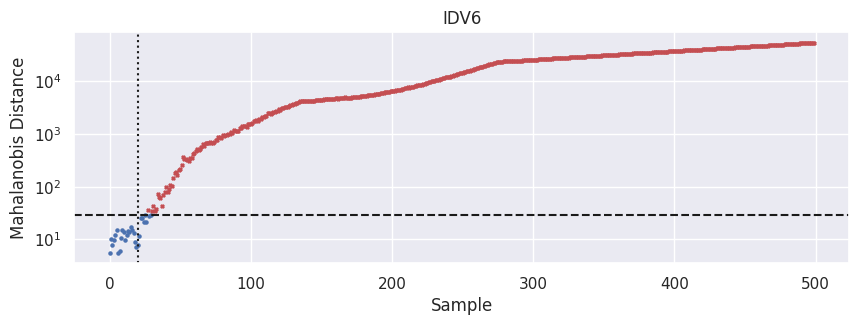

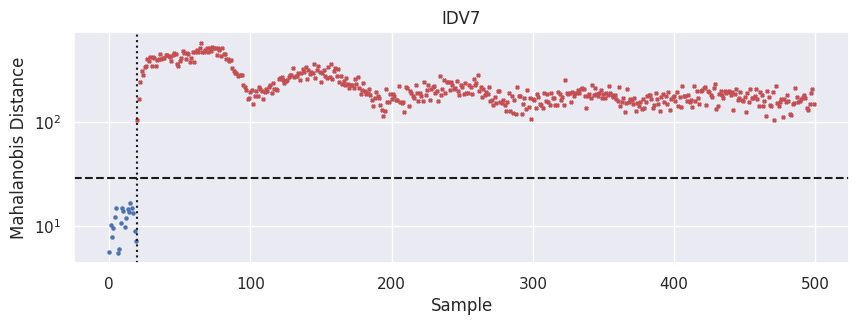

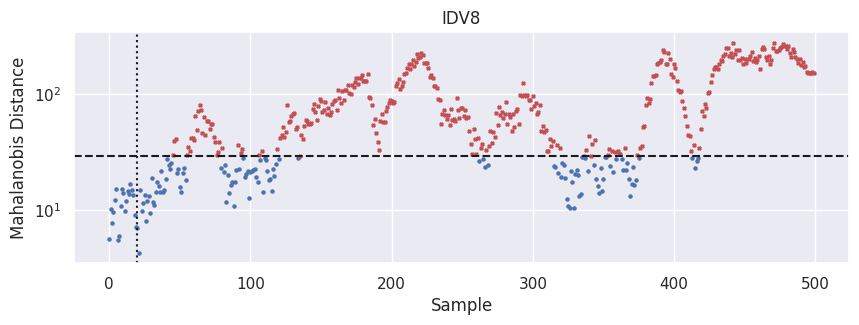

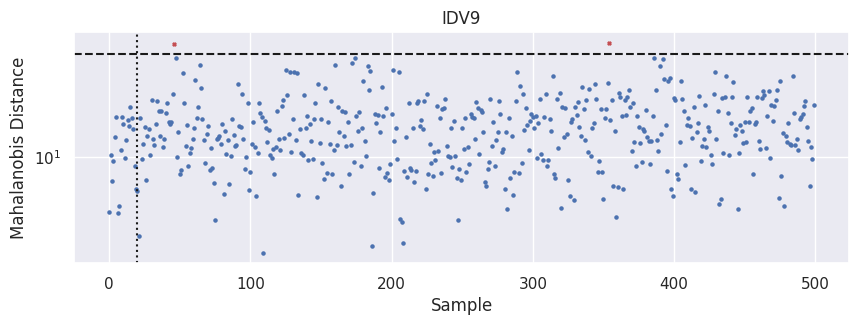

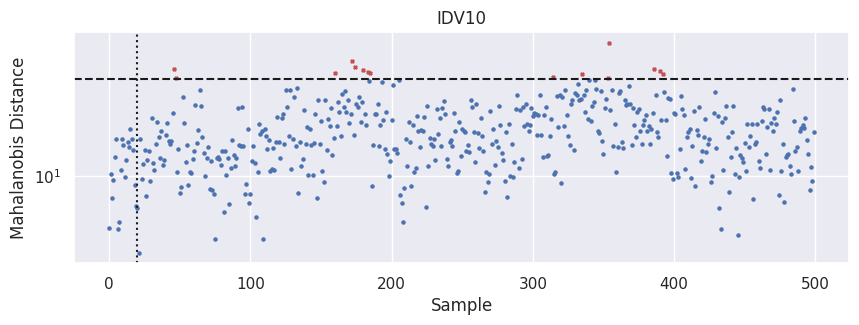

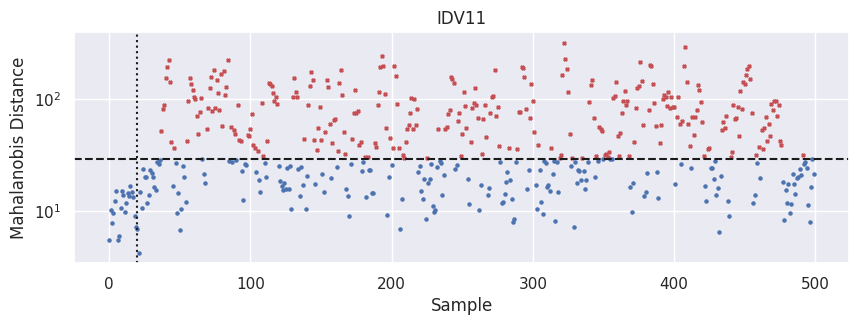

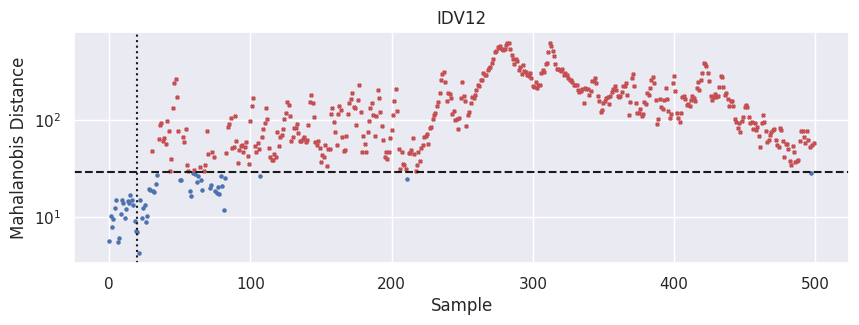

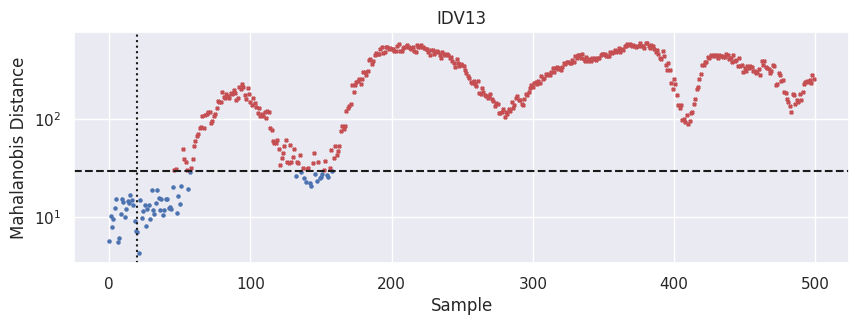

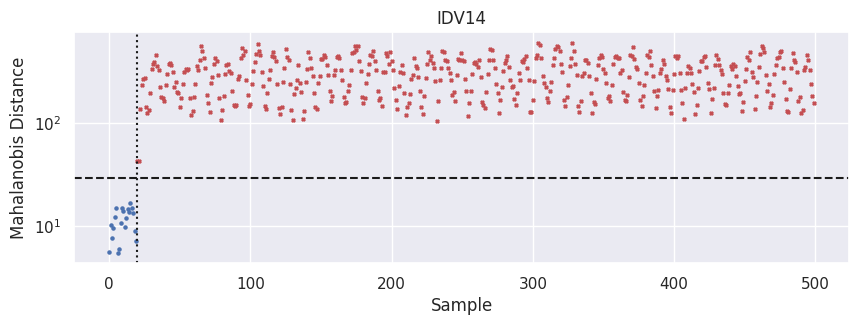

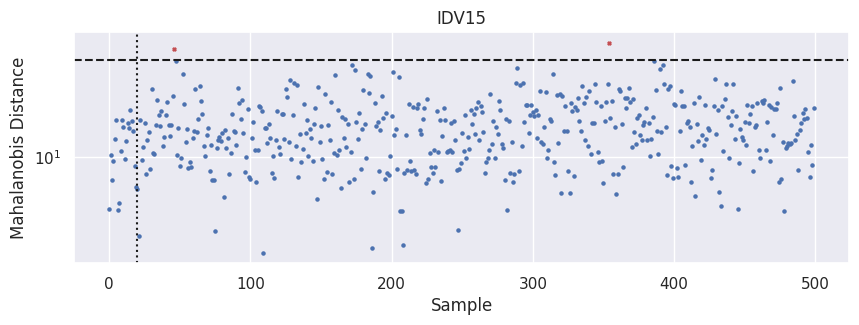

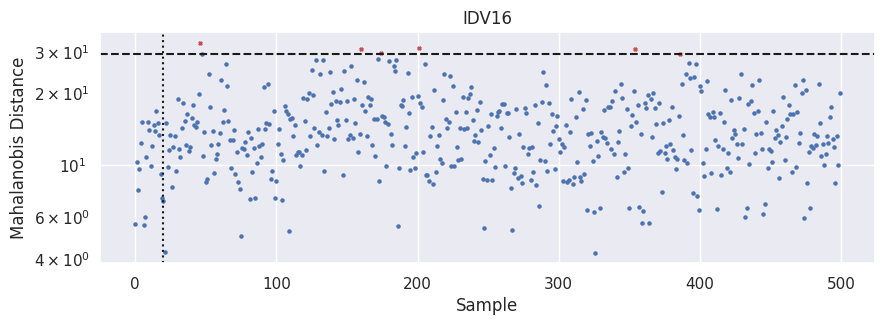

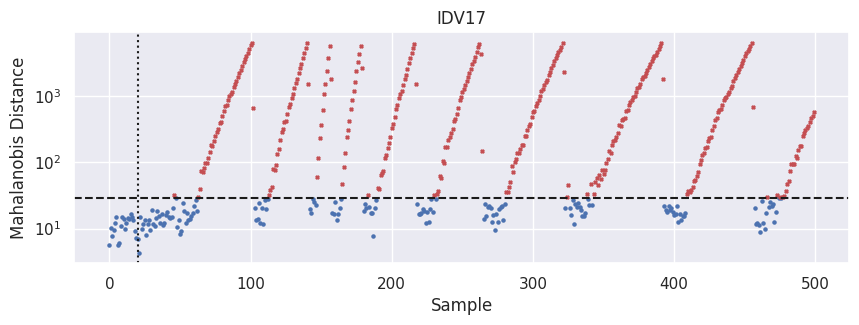

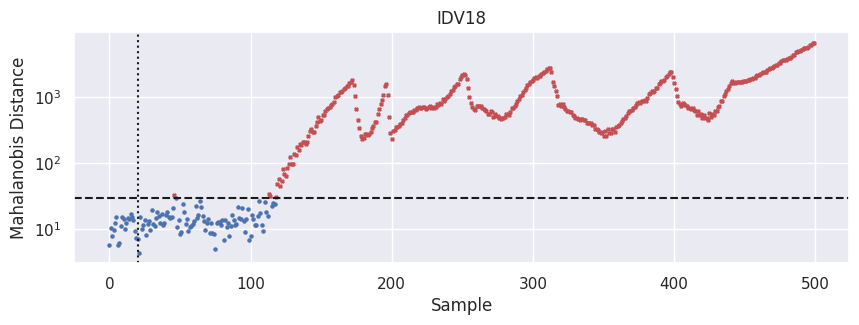

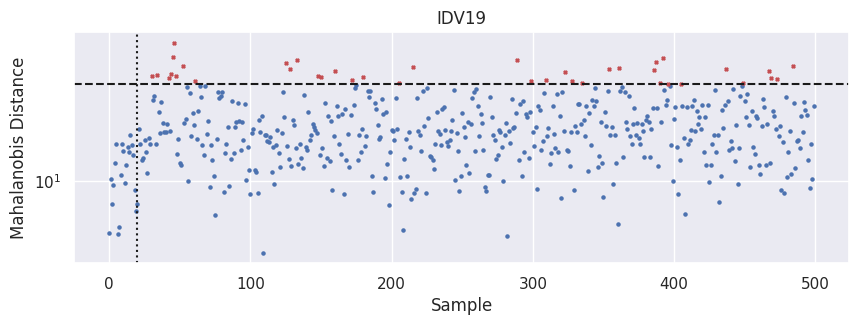

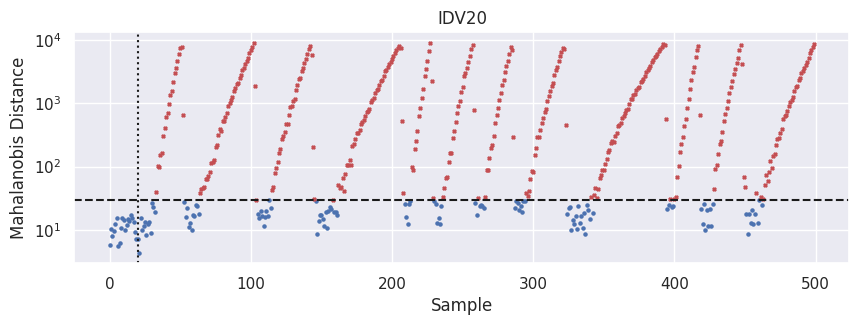

In [31]:
for fault in range(1,21):
    faulty_selected = faulty[(faulty['faultNumber']==fault) & (faulty['simulationRun']==1)][normal_features]

    faulty_mahalanobis_distances = np.array([
        np.linalg.norm(
            np.dot(np.subtract(x.values, mean_faultfree), np.linalg.inv(cov_faultfree)).dot(np.subtract(x.values, mean_faultfree).T)
        ) for _, x in faulty_selected.iterrows()
    ])

    plt.figure(figsize=(10,3))

    below_threshold = faulty_mahalanobis_distances < threshold
    above_threshold = faulty_mahalanobis_distances >= threshold

    plt.scatter(x=np.where(below_threshold)[0], y=faulty_mahalanobis_distances[below_threshold], s=5, c='b', marker='o')
    plt.scatter(x=np.where(above_threshold)[0], y=faulty_mahalanobis_distances[above_threshold], s=5, c='r', marker='X')

    plt.axhline(threshold, ls='dashed', c='k')
    plt.axvline(20, ls='dotted', c='k')

    plt.yscale('log')
    plt.xlabel('Sample')
    plt.ylabel('Mahalanobis Distance')
    plt.title(f'IDV{fault}')


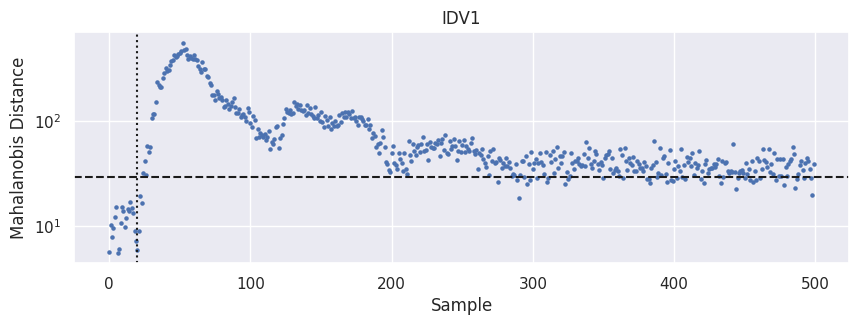

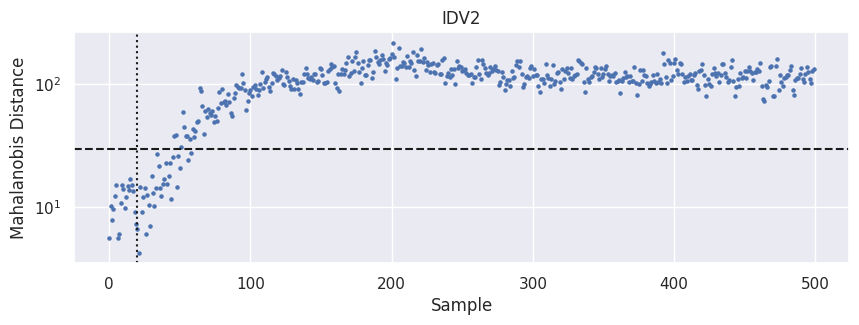

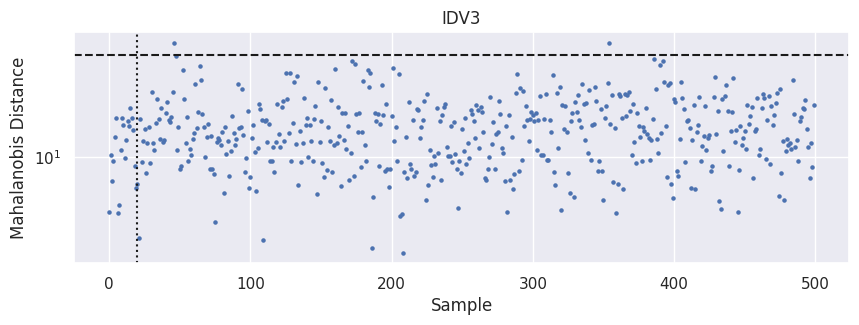

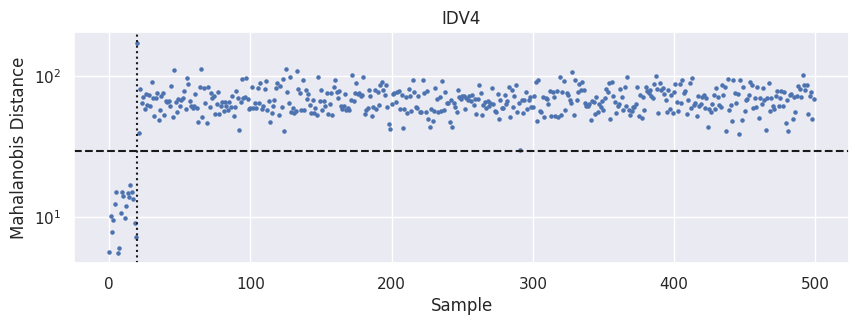

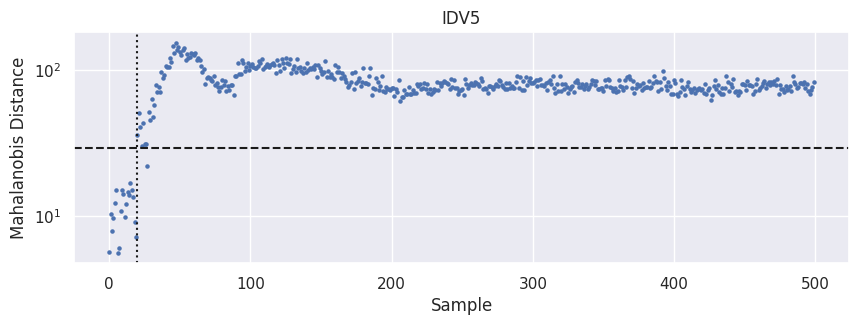

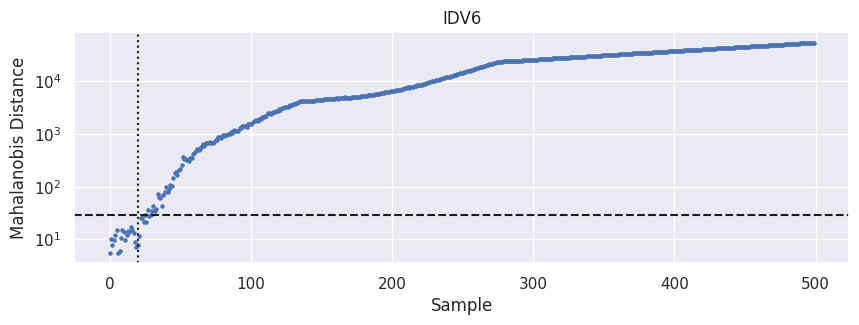

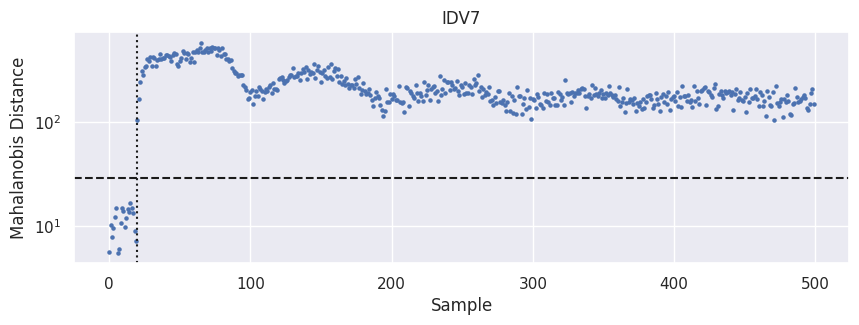

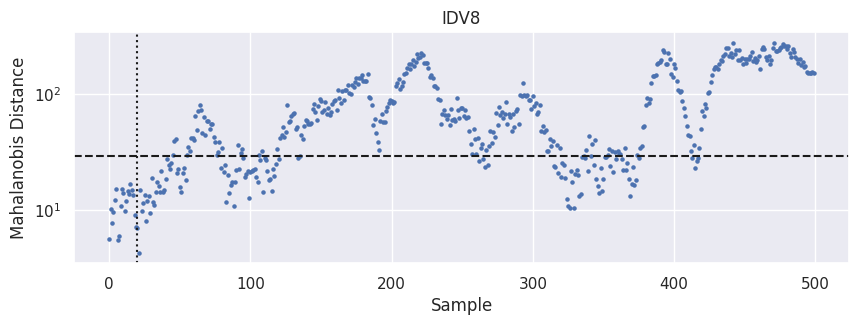

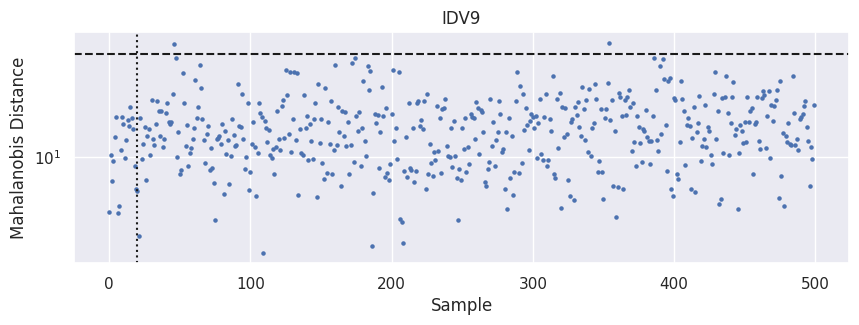

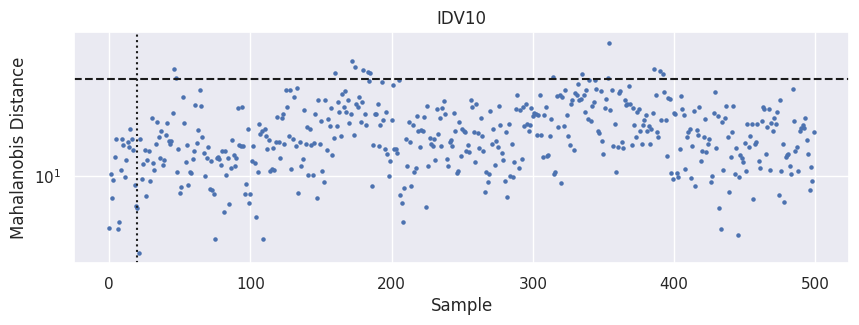

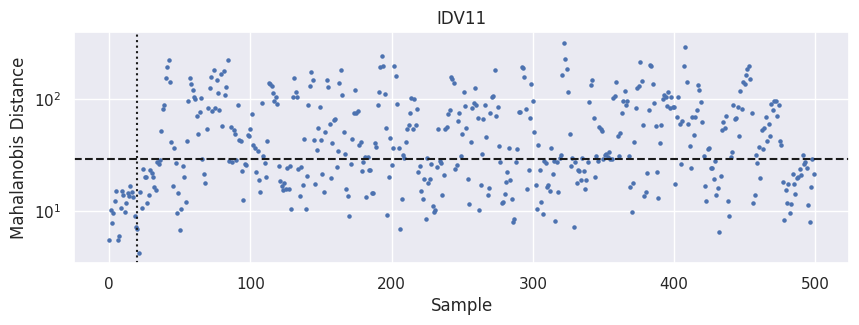

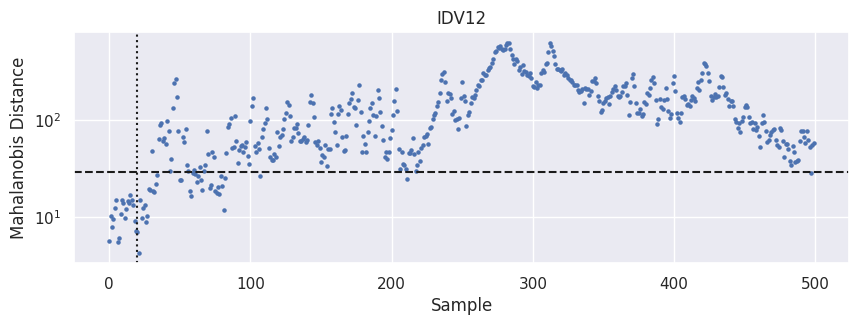

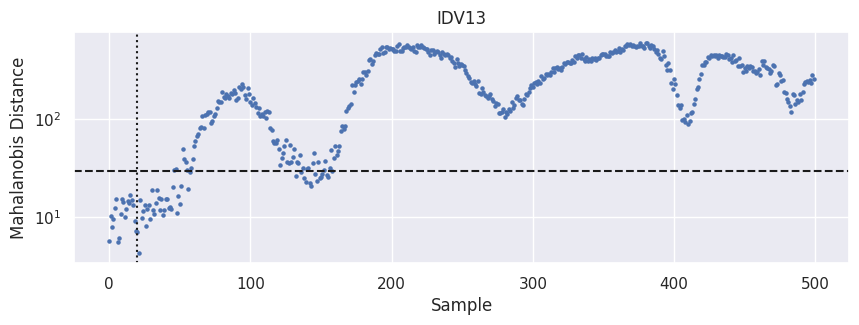

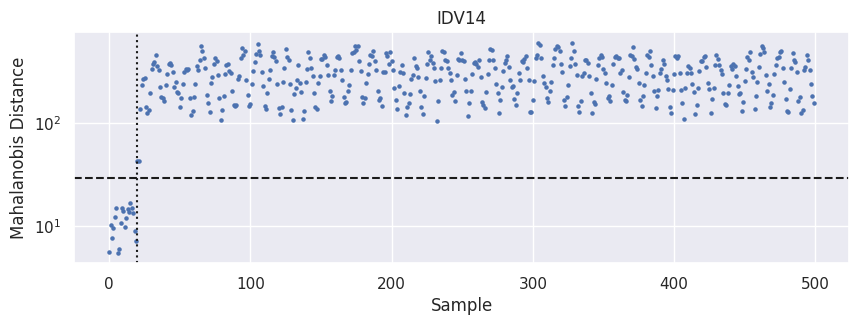

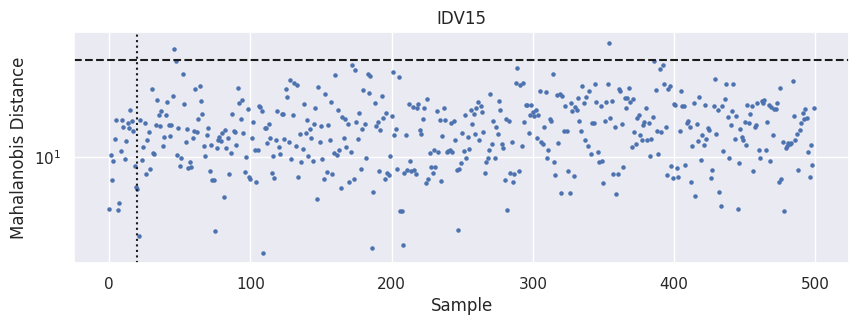

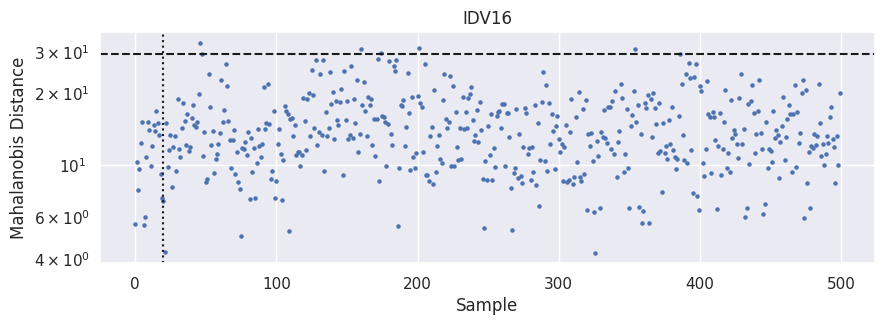

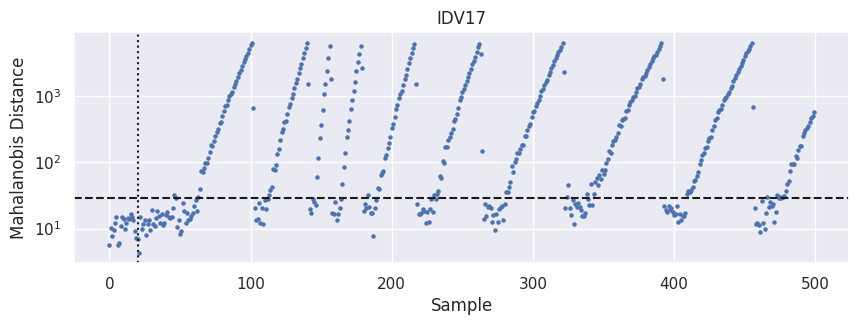

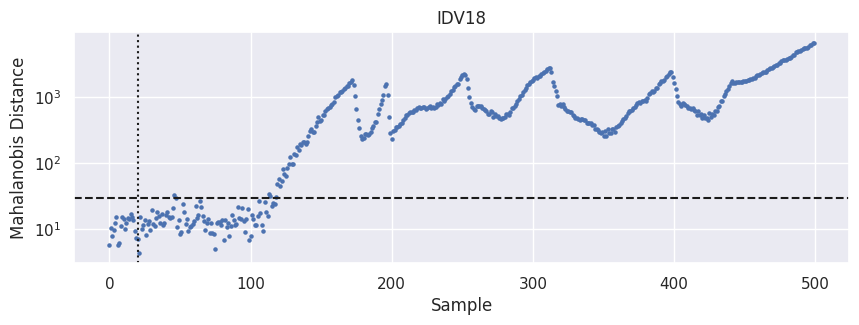

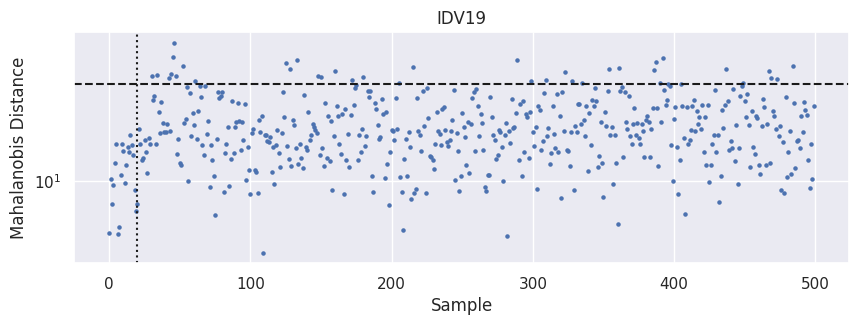

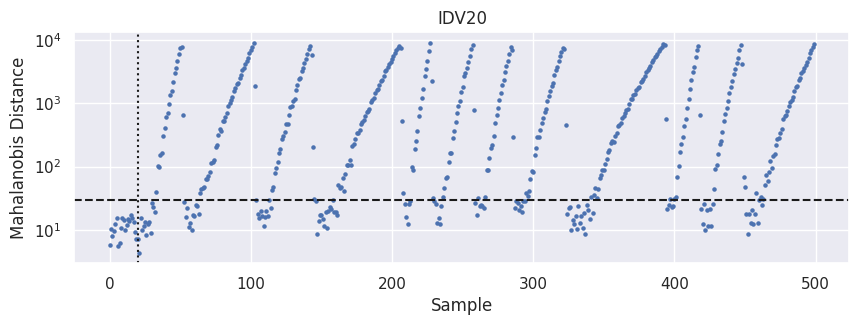

In [23]:
# ONE SIMULATION RUN

good = []
bad = []

for fault in range(1,21):
    faulty_selected = faulty[(faulty['faultNumber']==fault) & (faulty['simulationRun']==1)][normal_features]

    faulty_mahalanobis_distances = np.array([
        np.linalg.norm(
            np.dot(np.subtract(x.values, mean_faultfree), np.linalg.inv(cov_faultfree)).dot(np.subtract(x.values, mean_faultfree).T)
        ) for _, x in faulty_selected.iterrows()
    ])

    if faulty_mahalanobis_distances < threshold:
        good.append(faulty_mahalanobis_distances)
    else:
        bad.append(faulty_mahalanobis_distances)

    plt.figure(figsize=(10,3))
    #plt.plot(faulty_mahalanobis_distances)
    plt.scatter(x=range(len(faulty_mahalanobis_distances)), y=faulty_mahalanobis_distances, s=5)
    plt.axhline(threshold, ls='dashed', c='k')
    plt.axvline(20, ls='dotted', c='k')


    plt.yscale('log')
    plt.xlabel('Sample')
    plt.ylabel('Mahalanobis Distance')
    plt.title(f'IDV{fault}')



In [ ]:
scoreDf = pd.DataFrame(list(scoreDict.items()), columns=['IDV', 'MaxL'])

scoreDf['MaxL'] = scoreDf['MaxL'].round(4)*100
scoreDf['MaxL'][6] = 100.00

scoreDf

<ipython-input-65-46b00083379d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scoreDf['MaxL'][6] = 100.00


IDV    MaxL
0    IDV1   83.16
1    IDV2   93.71
2    IDV3    0.62
3    IDV4   99.97
4    IDV5   99.30
5    IDV6   97.96
6    IDV7  100.00
7    IDV8   85.58
8    IDV9    0.60
9   IDV10    3.39
10  IDV11   62.15
11  IDV12   94.21
12  IDV13   89.16
13  IDV14   99.89
14  IDV15    0.69
15  IDV16    1.70
16  IDV17   67.27
17  IDV18   88.72
18  IDV19    6.30
19  IDV20   72.72

In [ ]:
scoreDf.to_csv('/content/drive/MyDrive/Thesis/comparison/MaxLikelihood.csv', index=False)

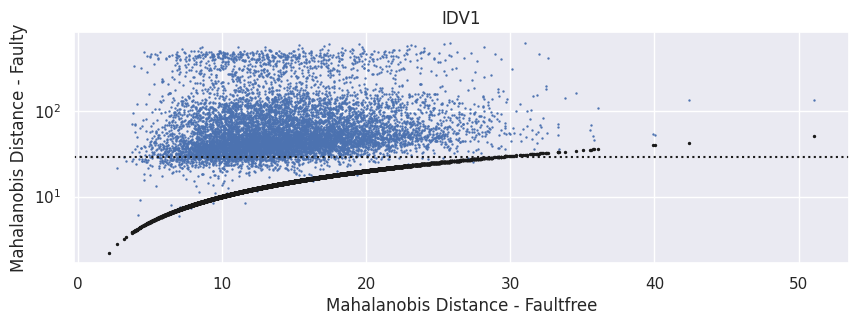

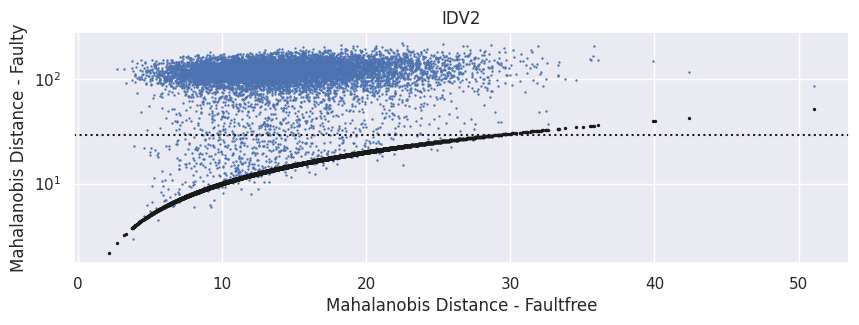

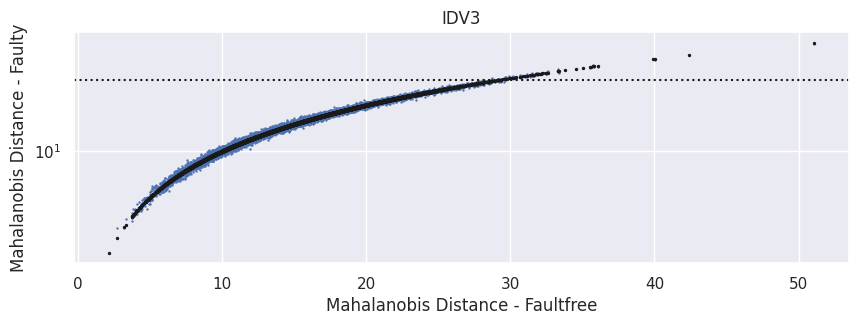

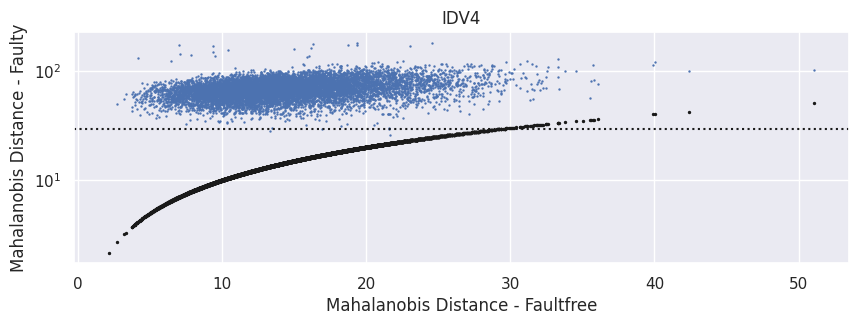

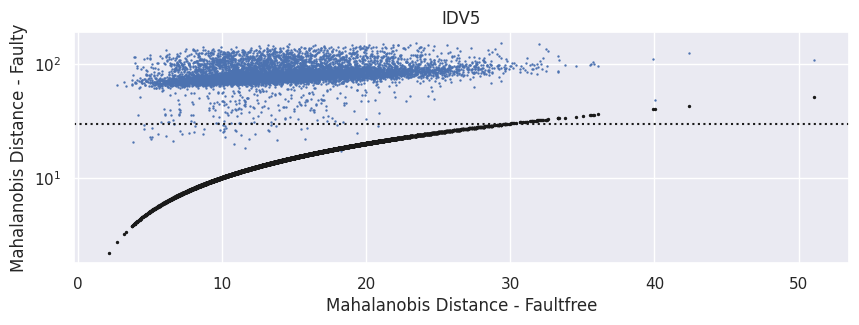

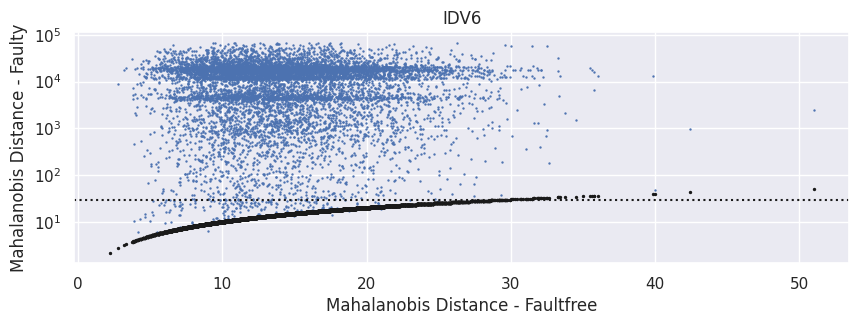

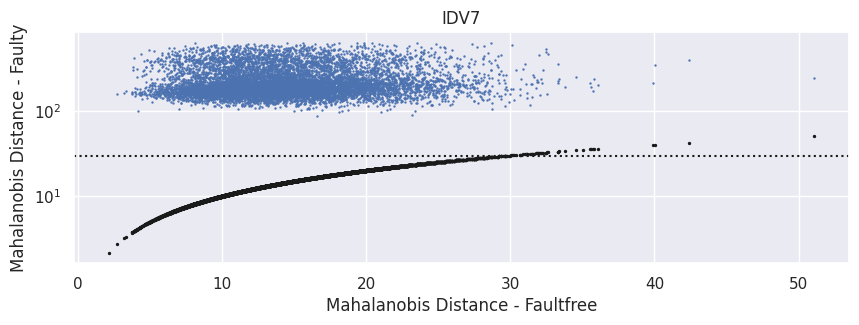

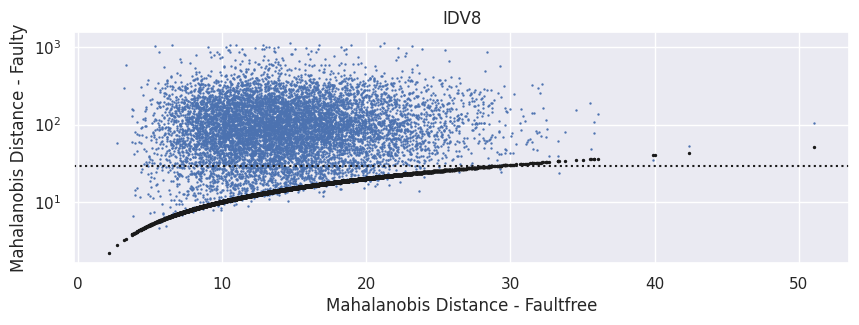

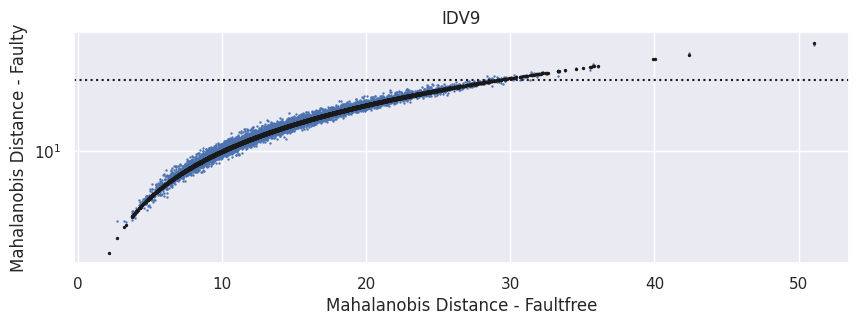

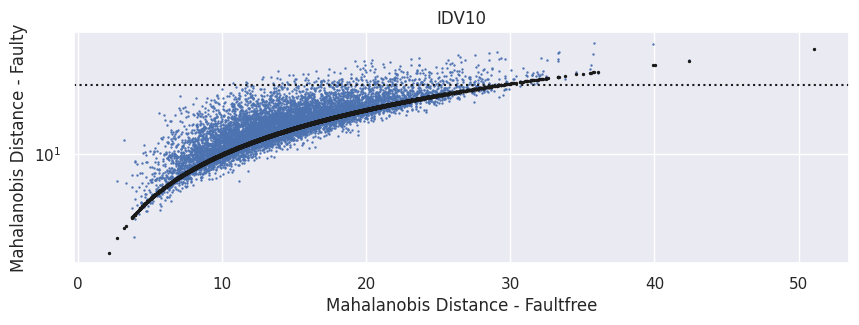

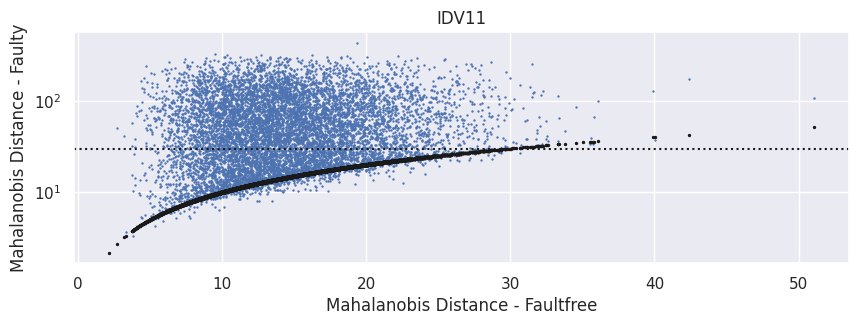

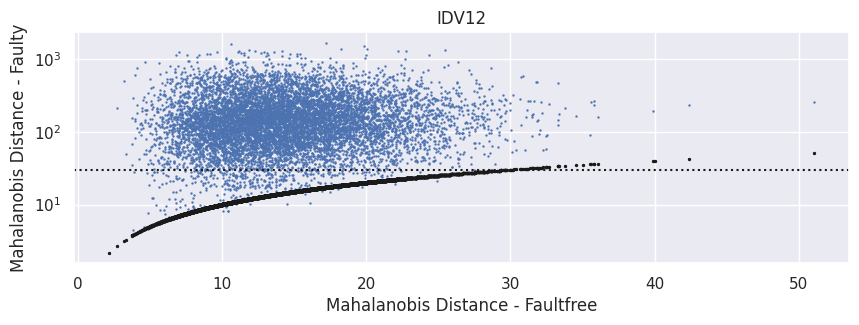

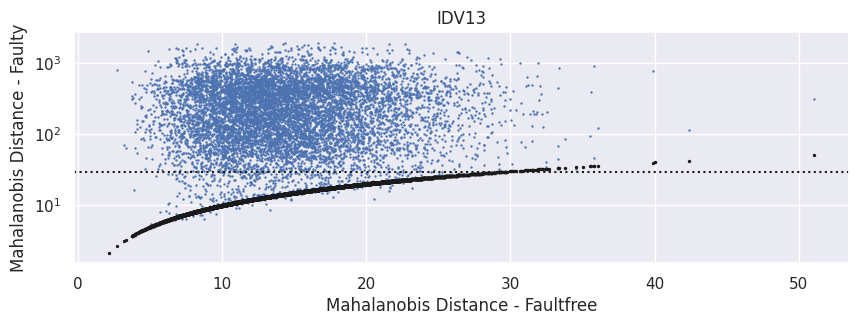

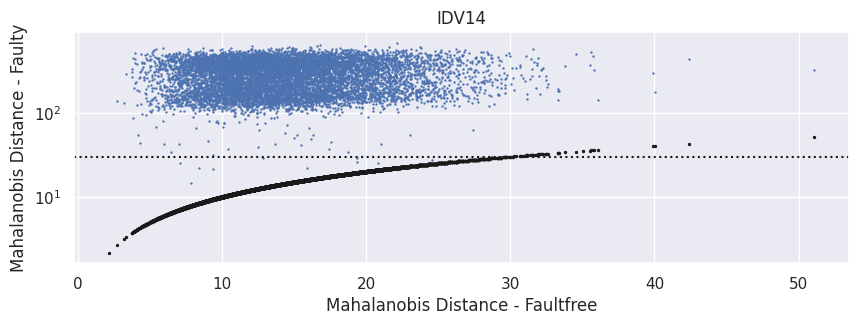

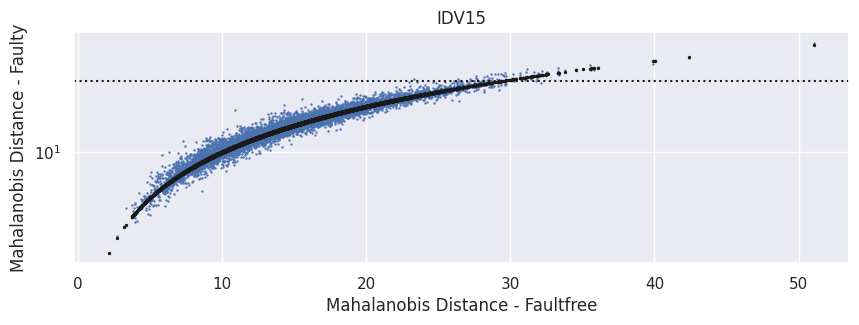

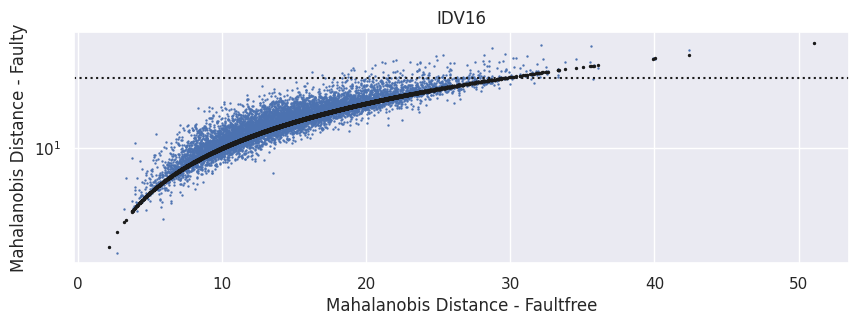

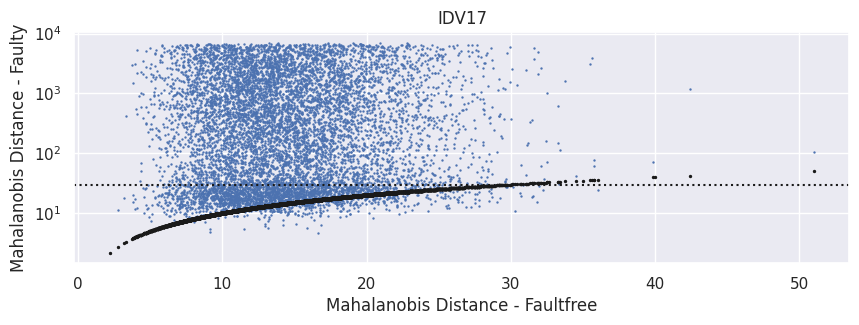

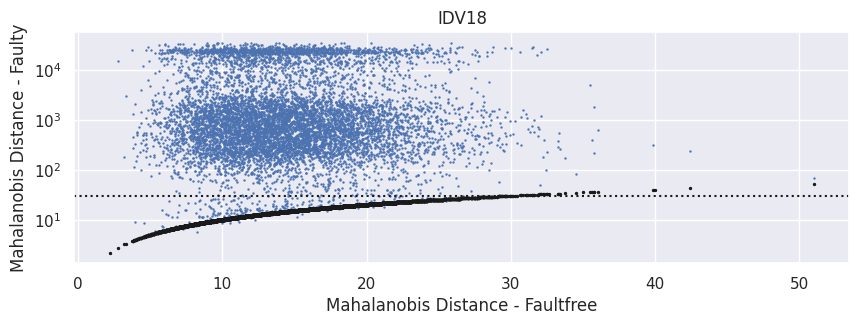

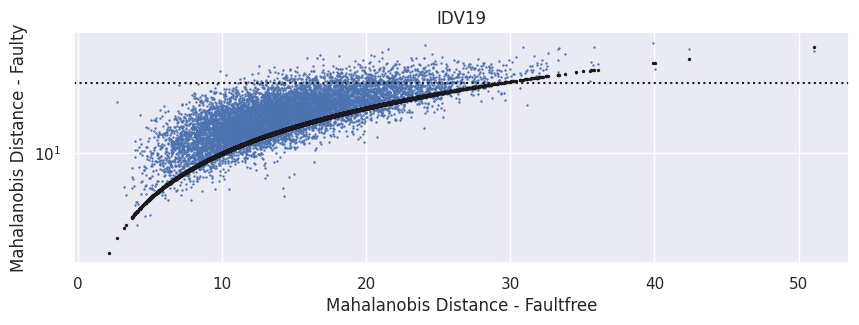

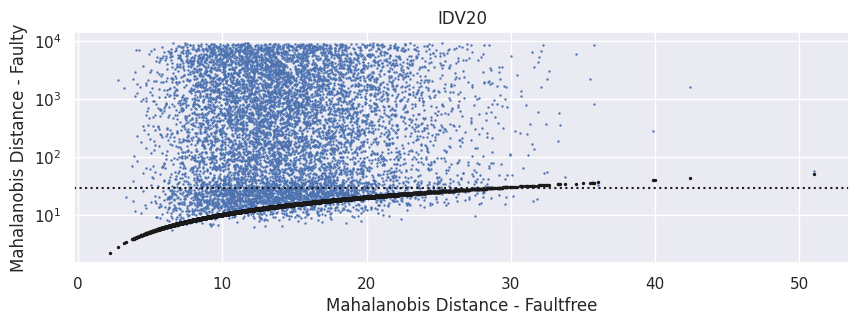

In [33]:
distanceDict = {}

for fault in range(1,21):
    faulty_selected = faulty[(faulty['faultNumber']==fault) & (faulty['simulationRun'].isin(range(*simRange)))][normal_features]
    #faulty_selected = faulty[(faulty['faultNumber']==fault) & (faulty['simulationRun']==1)][normal_features]

    faulty_mahalanobis_distances = np.array([
        np.linalg.norm(
            np.dot(np.subtract(x.values, mean_faultfree), np.linalg.inv(cov_faultfree)).dot(np.subtract(x.values, mean_faultfree).T)
        ) for _, x in faulty_selected.iterrows()
    ])

    key = f'IDV{fault}'
    distanceDict[key] = faulty_mahalanobis_distances

    plt.figure(figsize=(10,3))
    #plt.plot(faulty_mahalanobis_distances)
    plt.scatter(x=mahalanobis_distances, y=faulty_mahalanobis_distances, s=0.5)
    plt.scatter(mahalanobis_distances, mahalanobis_distances, s=2, c='k')
    plt.axhline(threshold, ls='dotted', c='k')

    #for simRun in range(len(range(*simRange))):
        #plt.axvline(simRun*500, c='k', ls='dotted', lw=1)

    plt.yscale('log')
    plt.xlabel('Mahalanobis Distance - Faultfree')
    plt.ylabel('Mahalanobis Distance - Faulty')
    plt.title(f'IDV{fault}')

In [ ]:
distanceDict

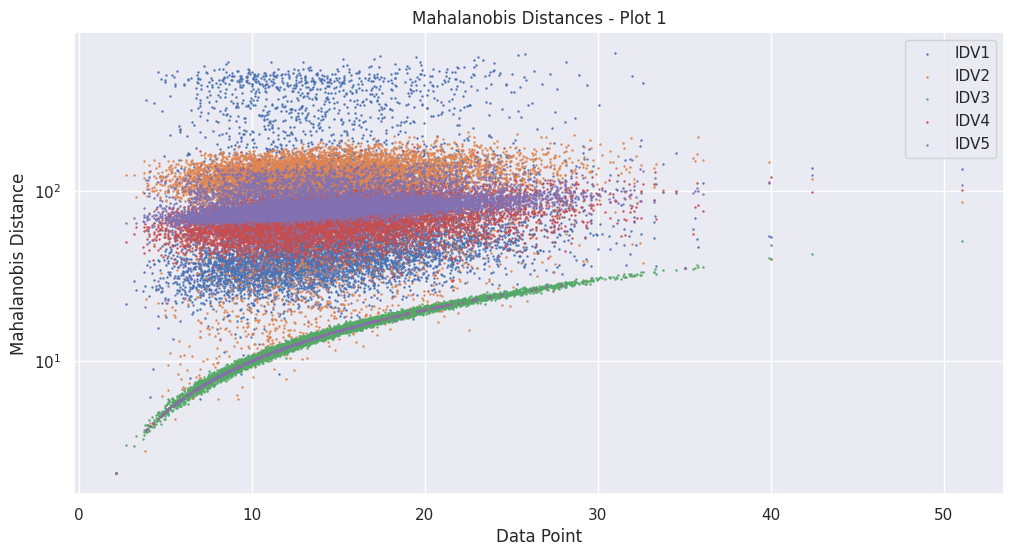

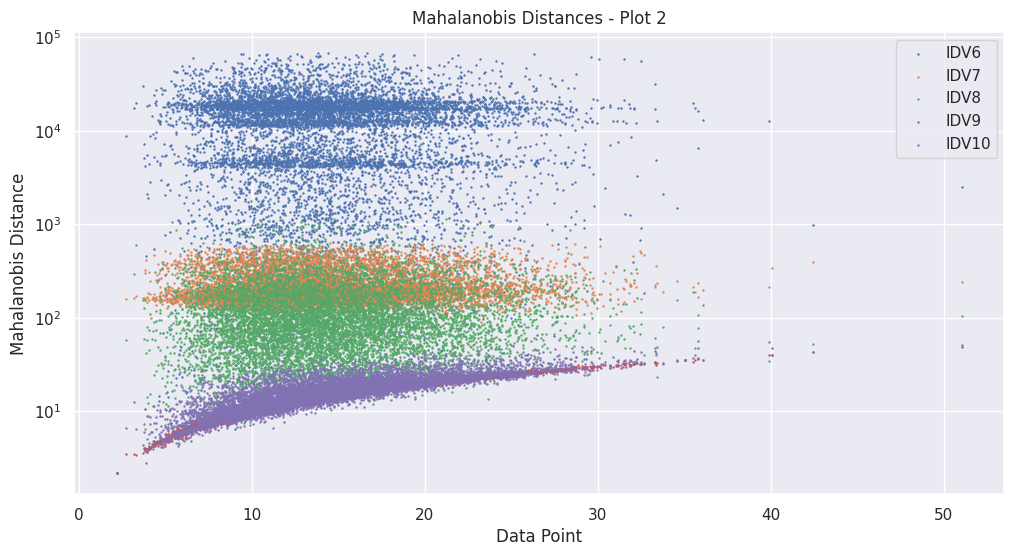

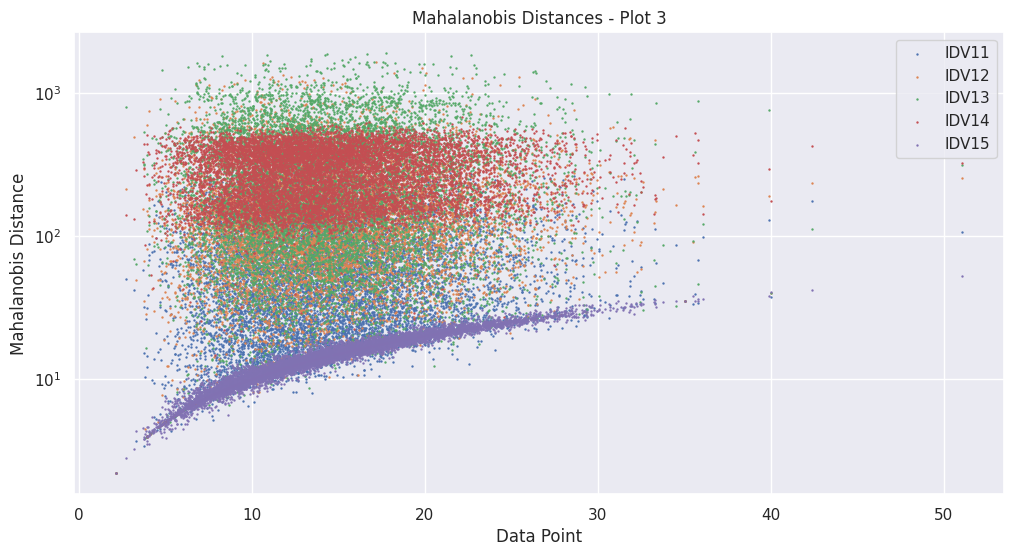

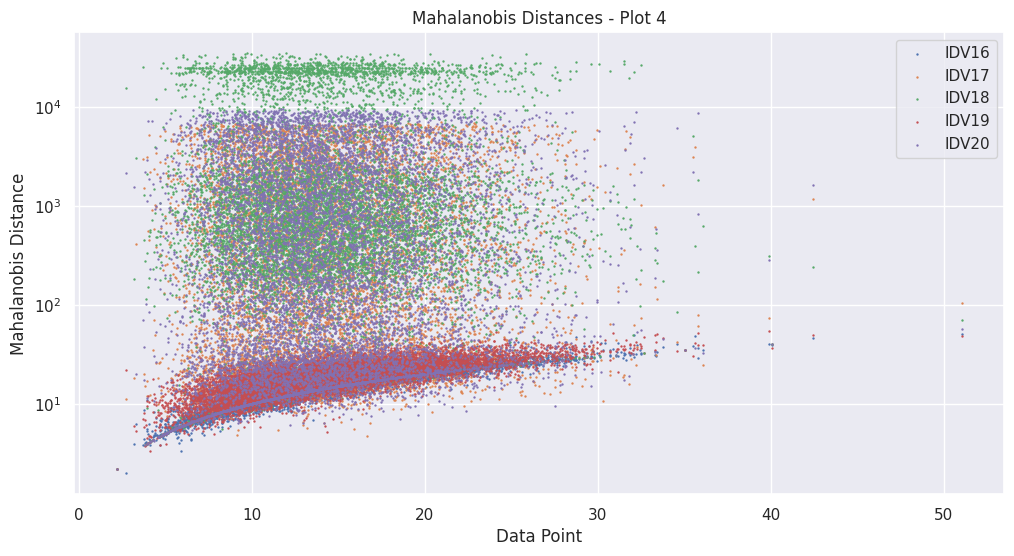

In [ ]:
idvs_per_plot = 5

# Calculate the total number of plots
total_plots = len(distanceDict) // idvs_per_plot
if len(distanceDict) % idvs_per_plot != 0:
    total_plots += 1

# Loop through each plot
for plot_num in range(total_plots):
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    # Get the relevant keys for the current plot
    keys_for_plot = list(distanceDict.keys())[plot_num * idvs_per_plot : (plot_num + 1) * idvs_per_plot]

    # Plot each IDV in the current plot
    for key in keys_for_plot:
        plt.scatter(mahalanobis_distances ,distanceDict[key], label=key, s=0.5)

    plt.yscale('log')
    plt.title(f'Mahalanobis Distances - Plot {plot_num + 1}')
    plt.xlabel('Data Point')
    plt.ylabel('Mahalanobis Distance')
    plt.legend()
    plt.show()


<Axes: >

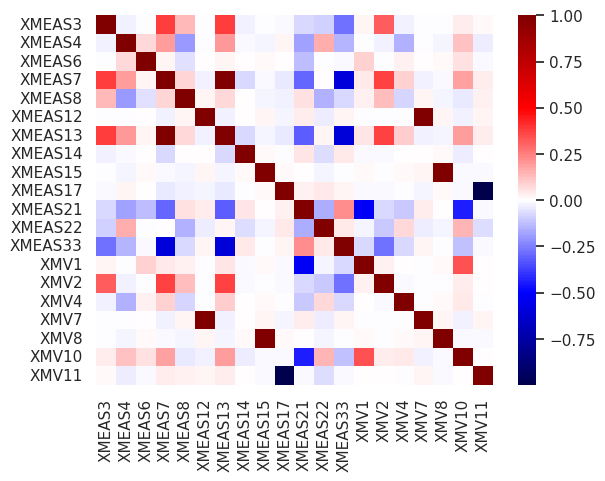

In [ ]:
sns.heatmap(faultfree_selected.corr(), annot=False, cmap="seismic", fmt=".2f")